In [ ]:
from google.colab import files
uploaded = files.upload()


Saving zomato.csv to zomato.csv


In [ ]:
import pandas as pd

df = pd.read_csv("zomato.csv", encoding="latin-1")  # file name must match exactly
df.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [ ]:
import os
os.listdir()


['.config', 'zomato.csv', 'sample_data']

In [ ]:
import pandas as pd

# Load the Zomato dataset
df = pd.read_csv("zomato.csv", encoding="latin-1")

# Preview the first 5 rows
df.head()


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [ ]:
import numpy as np

# Clean rate column
df['rate'] = df['rate'].astype(str).str.strip()
df['rate'] = df['rate'].str.replace('/5', '')
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], np.nan)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Clean cost column
df.rename(columns={'approx_cost(for two people)': 'cost'}, inplace=True)
df['cost'] = df['cost'].astype(str).str.replace(',', '')
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check for missing values
df.isnull().sum()


,0
address,2
name,1
online_order,4
book_table,38
rate,9488
votes,58
phone,729
location,97
rest_type,236
dish_liked,16694


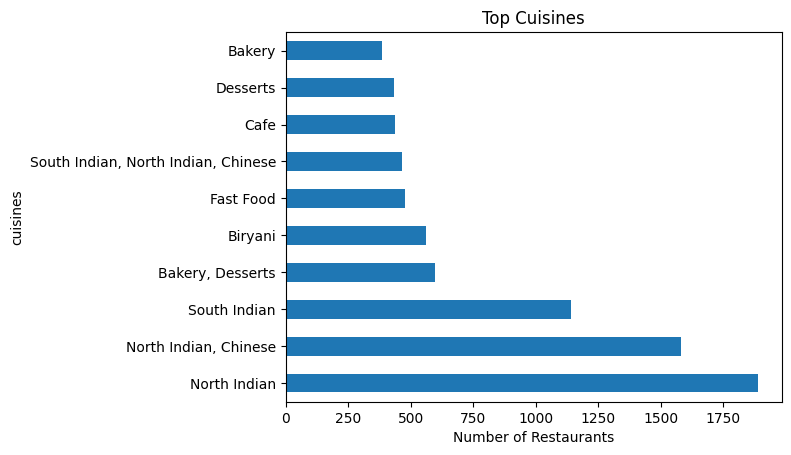

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['cuisines'].value_counts().head(10).plot(kind='barh', title="Top Cuisines")
plt.xlabel("Number of Restaurants")
plt.show()


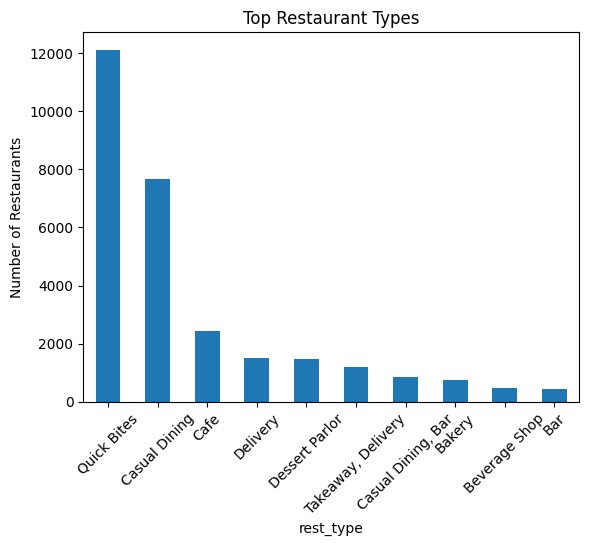

In [ ]:
df['rest_type'].value_counts().head(10).plot(kind='bar', title='Top Restaurant Types')
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


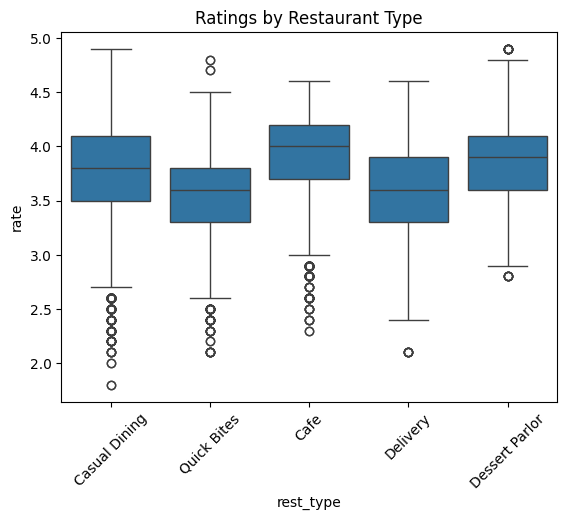

In [ ]:
top_types = df['rest_type'].value_counts().head(5).index
sns.boxplot(data=df[df['rest_type'].isin(top_types)], x='rest_type', y='rate')
plt.title('Ratings by Restaurant Type')
plt.xticks(rotation=45)
plt.show()


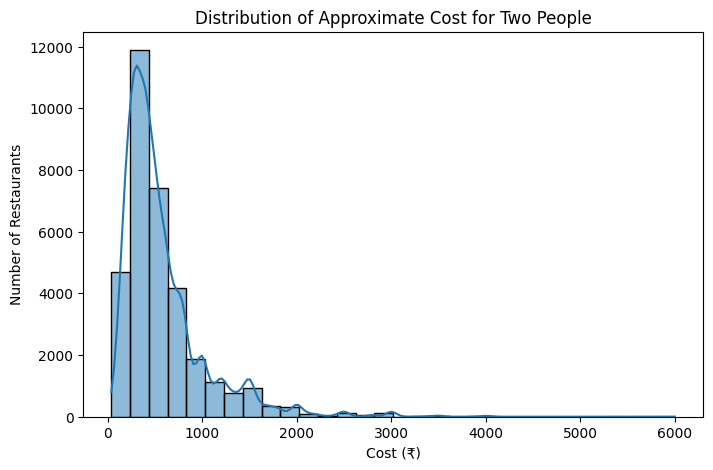

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['cost'], bins=30, kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Cost (₹)')
plt.ylabel('Number of Restaurants')
plt.show()


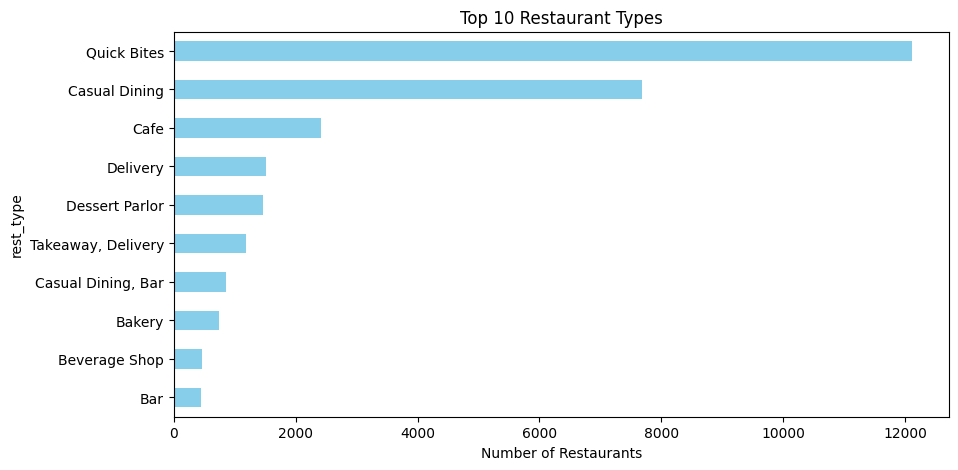

In [ ]:
plt.figure(figsize=(10, 5))
df['rest_type'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Number of Restaurants')
plt.gca().invert_yaxis()
plt.show()


/tmp/ipython-input-920637830.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rest_type_counts.values, y=rest_type_counts.index, palette='mako')


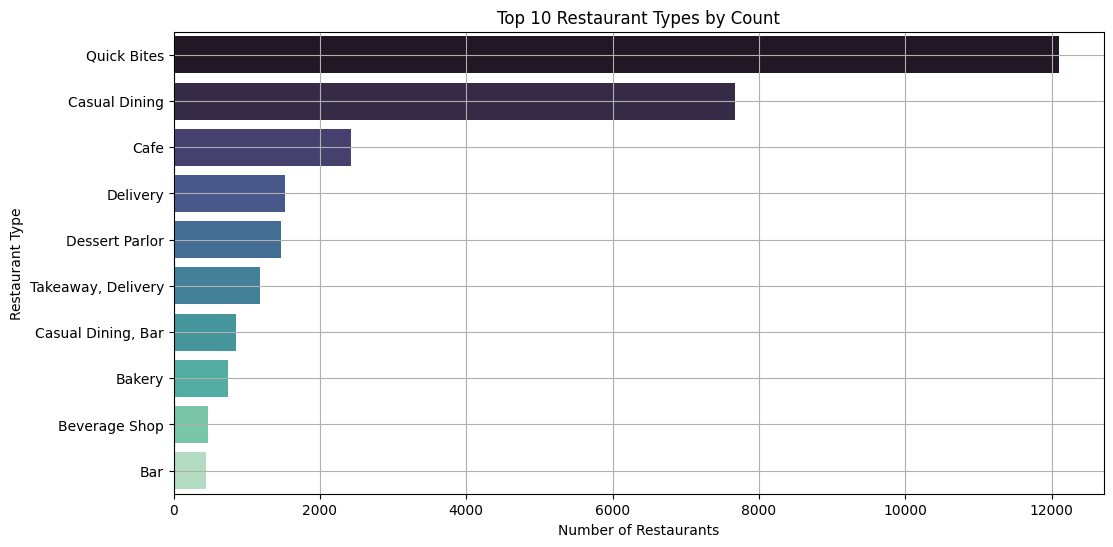

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each restaurant type
rest_type_counts = df['rest_type'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=rest_type_counts.values, y=rest_type_counts.index, palette='mako')
plt.title('Top 10 Restaurant Types by Count')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.grid(True)
plt.show()


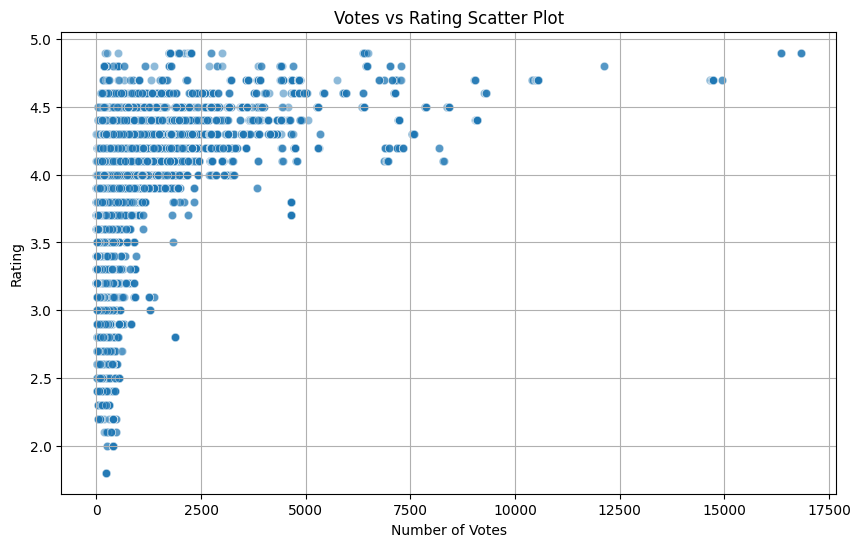

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Zomato dataset (make sure 'zomato.csv' exists in your working directory)
df = pd.read_csv('zomato.csv')  # <- Change the filename if needed

# Clean 'rate' column
df['rate'] = df['rate'].astype(str).str.replace('/5', '', regex=False)
df['rate'] = df['rate'].replace(['NEW', '-'], None)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Drop rows with missing 'votes' or 'rate'
votes_rating_df = df[['votes', 'rate']].dropna()

# Convert 'votes' to numeric if needed
votes_rating_df['votes'] = pd.to_numeric(votes_rating_df['votes'], errors='coerce')
votes_rating_df = votes_rating_df.dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=votes_rating_df, x='votes', y='rate', alpha=0.5)
plt.title('Votes vs Rating Scatter Plot')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.grid(True)
plt.show()
